In [1]:
import pandas as pd
df = pd.read_csv('database.csv', parse_dates=[0])
df["date_time"] = pd.to_datetime(df.epoch, unit="s", utc=True).dt.tz_convert("US/Pacific")

In [2]:
daily_totals = df.set_index('date_time').groupby(pd.Grouper(freq='D')).sum().reset_index()

In [3]:
daily_totals.tail(10)

,date_time,value
281,2020-09-18 00:00:00-07:00,36.0
282,2020-09-19 00:00:00-07:00,32.0
283,2020-09-20 00:00:00-07:00,28.0
284,2020-09-21 00:00:00-07:00,24.0
285,2020-09-22 00:00:00-07:00,20.0
286,2020-09-23 00:00:00-07:00,20.0
287,2020-09-24 00:00:00-07:00,17.0
288,2020-09-25 00:00:00-07:00,16.0
289,2020-09-26 00:00:00-07:00,15.0
290,2020-09-27 00:00:00-07:00,16.5


daily_totals.plot(kind='bar', x='date_time', y='value', figsize=(20,10))

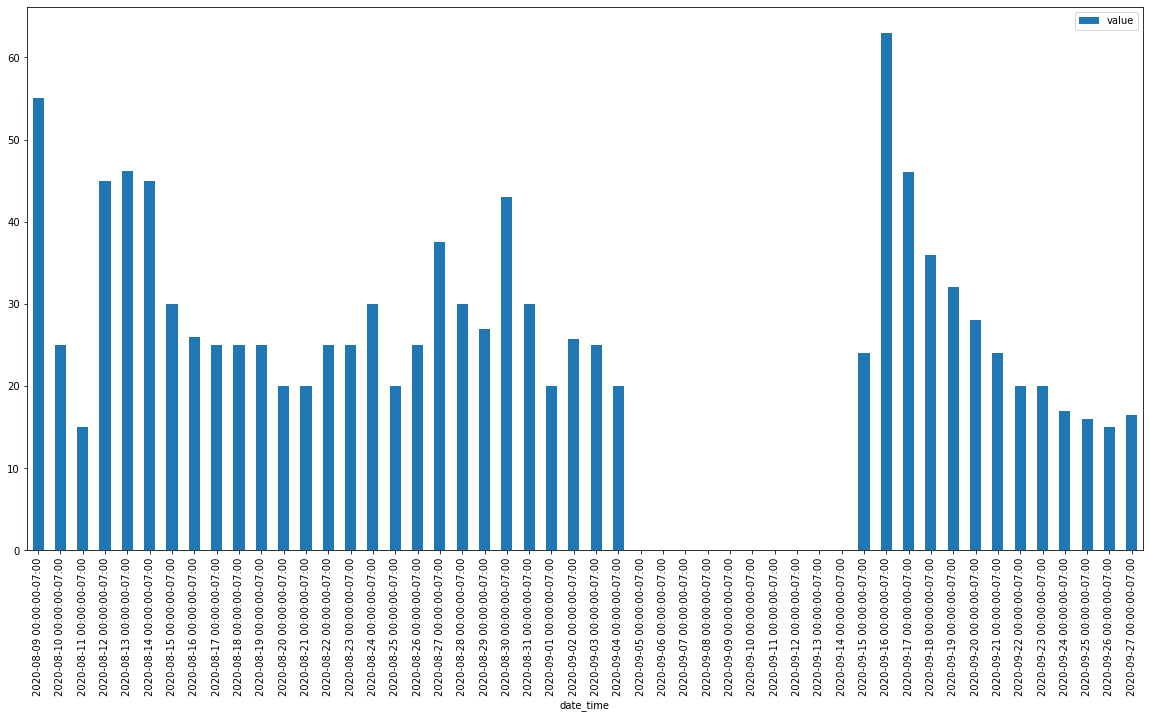

In [4]:
daily_totals.tail(50).plot(kind='bar', x='date_time', y='value', figsize=(20,10))

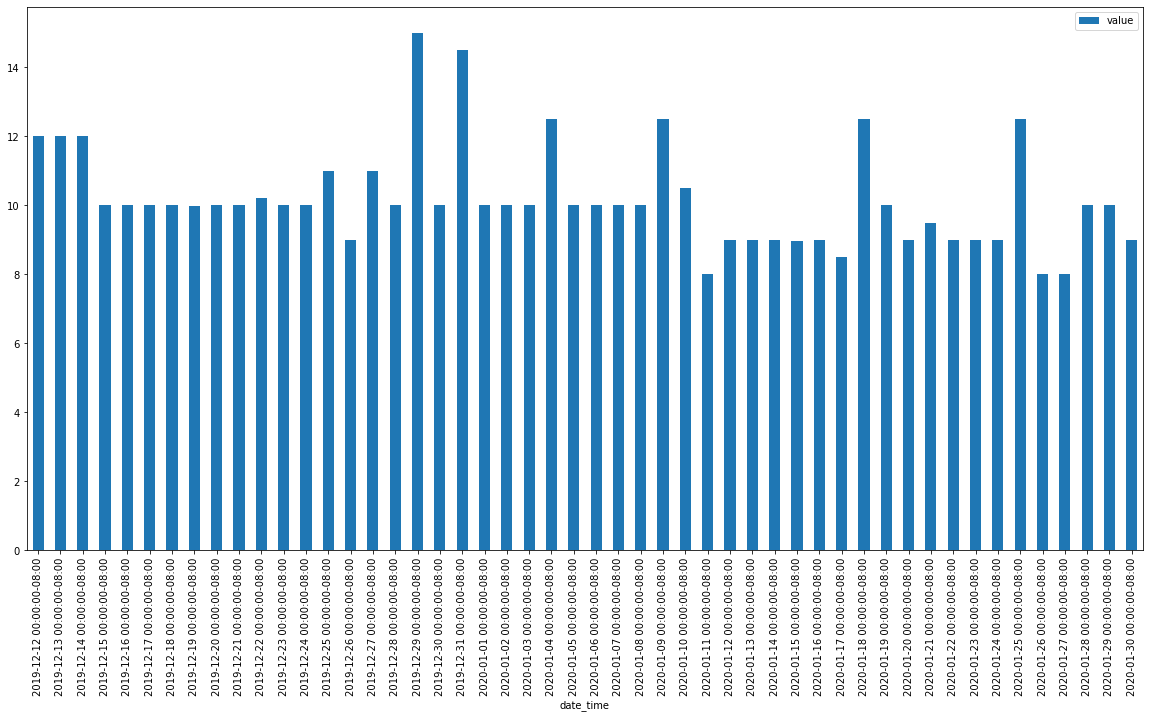

In [5]:
daily_totals.head(50).plot(kind='bar', x='date_time', y='value', figsize=(20,10))

In [6]:
weekly_totals = df.set_index('date_time').groupby(pd.Grouper(freq='W')).sum().reset_index()

In [7]:
weekly_totals.tail(10)

,date_time,value
32,2020-07-26 00:00:00-07:00,175.0
33,2020-08-02 00:00:00-07:00,176.0
34,2020-08-09 00:00:00-07:00,251.0
35,2020-08-16 00:00:00-07:00,232.2
36,2020-08-23 00:00:00-07:00,165.0
37,2020-08-30 00:00:00-07:00,212.5
38,2020-09-06 00:00:00-07:00,120.7
39,2020-09-13 00:00:00-07:00,0.0
40,2020-09-20 00:00:00-07:00,229.0
41,2020-09-27 00:00:00-07:00,128.5


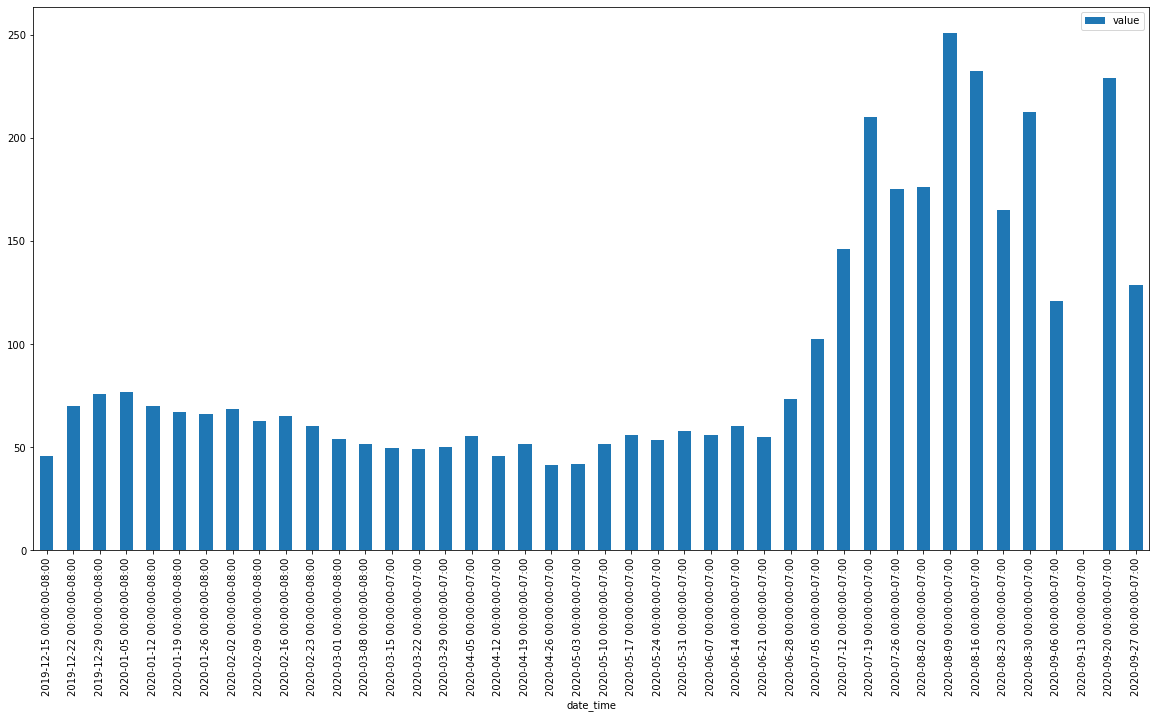

In [8]:
weekly_totals.plot(kind='bar', x='date_time', y='value', figsize=(20,10))

In [9]:
import matplotlib as mpl
mpl.pyplot.rcParams["figure.figsize"]=20,10

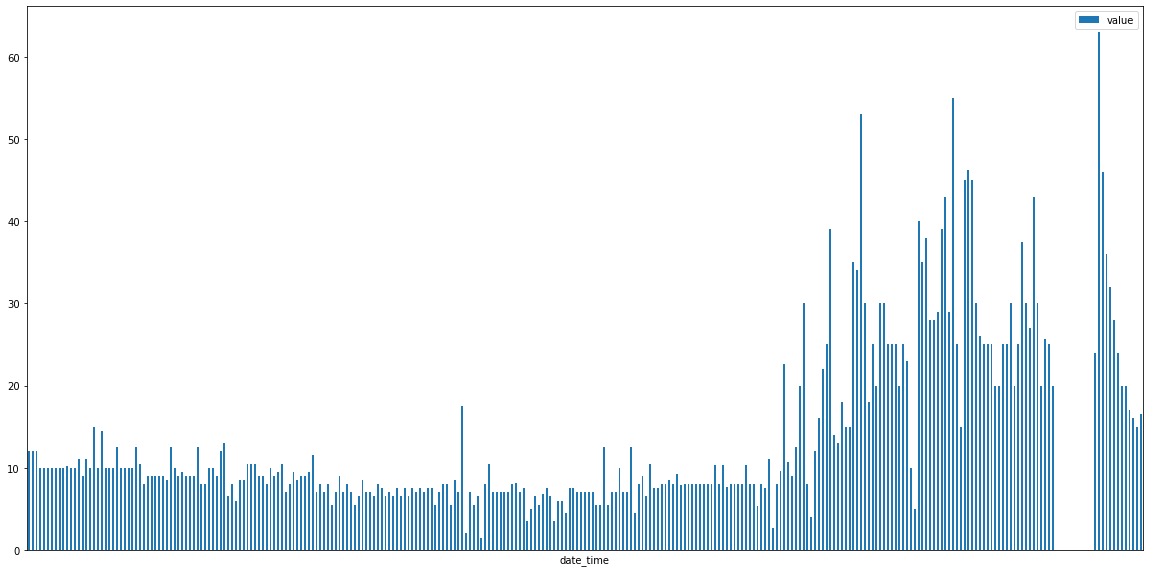

In [10]:
daily_totals2 = df.set_index('date_time').groupby(pd.Grouper(freq='D')).sum()
# ax = plt.gca()
ax = daily_totals2.plot(kind='bar')
ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.MO))
# ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
mpl.pyplot.show()